In [2]:
# File paths
#sample_file = '/content/drive/MyDrive/Disfluency Task/Data/tamil_sample.tsv'
dev_file = '/content/drive/MyDrive/Disfluency Task/Training_Data_Split_50/marathi/marathi_dev_50.tsv'
train_file = '/content/drive/MyDrive/Disfluency Task/Training_Data_Split_50/marathi/marathi_train_50.tsv'

In [3]:
model_checkpoint = "bert-base-multilingual-cased"
batch_size = 32
max_sequence_length = 256
task = "disfluency"
epochs = 5

In [4]:
model_save_location="/content/drive/MyDrive/Disfluency Task/Model/Marathi-Bert"

## Installation

In [1]:
!pip install datasets
!pip install transformers torch
!pip install sentencepiece
!pip install seqeval
!pip install transformers torch
!pip install sentencepiece
!pip install accelerate -U
!pip install transformers[torch]
!pip install transformers[sentencepiece]
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=bc30247e8a47d1defcce2125a03cdaaeb23b3caca33e4218cbb7ceb8c05fa080
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.7 MB/s eta 0:00:00


## Data Loading

## Lable2List

In [5]:
label_list = [
  'O',
  'B-Alteration',
	'B-edit_R',
	'B-false_R',
	'B-filler_R',
	'B-pet_R',
	'B-repair_R',
	'B-repeat_R',
  'I-Alteration',
	'I-edit_R',
	'I-false_R',
	'I-filler_R',
	'I-pet_R',
	'I-repair_R',
	'I-repeat_R'
	]

In [6]:
label2id = {label: index for index, label in enumerate(label_list)}
id2label = {index: label for index, label in enumerate(label_list)}

In [7]:
label2id

{'O': 0,
 'B-Alteration': 1,
 'B-edit_R': 2,
 'B-false_R': 3,
 'B-filler_R': 4,
 'B-pet_R': 5,
 'B-repair_R': 6,
 'B-repeat_R': 7,
 'I-Alteration': 8,
 'I-edit_R': 9,
 'I-false_R': 10,
 'I-filler_R': 11,
 'I-pet_R': 12,
 'I-repair_R': 13,
 'I-repeat_R': 14}

In [8]:
id2label

{0: 'O',
 1: 'B-Alteration',
 2: 'B-edit_R',
 3: 'B-false_R',
 4: 'B-filler_R',
 5: 'B-pet_R',
 6: 'B-repair_R',
 7: 'B-repeat_R',
 8: 'I-Alteration',
 9: 'I-edit_R',
 10: 'I-false_R',
 11: 'I-filler_R',
 12: 'I-pet_R',
 13: 'I-repair_R',
 14: 'I-repeat_R'}

## Loading Data - Sample

In [9]:
from datasets import Dataset

def read_file_to_Dict(file_path):
    data = {'word': [], 'tag': []}
    with open(file_path, 'r', encoding='utf-8') as file:
        current_entry = {'word': [], 'tag': []}
        for line in file:
            line = line.strip()
            if not line:
                if current_entry['word']:
                    data['word'].append(current_entry['word'])
                    data['tag'].append(current_entry['tag'])
                    current_entry = {'word': [], 'tag': []}
            else:
                tokens = line.split('\t')
                current_entry['word'].append(tokens[0])
                #current_entry['tag'].append(tokens[1])
                current_entry['tag'].append(label2id.get(tokens[1]))  # Use -1 if tag is not in the mapping
        if current_entry['word']:
            data['word'].append(current_entry['word'])
            data['tag'].append(current_entry['tag'])
    return data


In [10]:
# Loading the sample file
#sample_file = '/content/sample_data/tamil_sample.tsv'
#sample_dict = read_file_to_Dict(sample_file)

In [11]:
# Displaying the list of list
#print(sample_dict['word'][0:3])
#print(sample_dict['tag'][0:3])

In [12]:
# Convert to Hugging Face Dataset
#sample_dataset = Dataset.from_dict(sample_dict)

In [13]:
#sample_dataset

In [14]:
#sample_dataset[0]

## Dataset Dict

In [15]:
train_dataset = Dataset.from_dict(read_file_to_Dict(train_file))

In [16]:
from datasets import Sequence, ClassLabel
#train_dataset = train_dataset.cast_column("tag",Sequence(ClassLabel(names=label_list)))

In [17]:
dev_dataset = Dataset.from_dict(read_file_to_Dict(dev_file))
#dev_dataset = dev_dataset.cast_column("tag",Sequence(ClassLabel(names=label_list)))

In [18]:
dataset_dict = {
    'train': train_dataset,
    'dev' : dev_dataset
}

In [19]:
from datasets import DatasetDict

datasets = DatasetDict(dataset_dict)

In [20]:
datasets

DatasetDict({
    train: Dataset({
        features: ['word', 'tag'],
        num_rows: 3645
    })
    dev: Dataset({
        features: ['word', 'tag'],
        num_rows: 371
    })
})

In [21]:
dataset_dict['dev'][0]

{'word': ['ठीक',
  'आहे',
  'hello',
  'पायल',
  'आपण',
  'car',
  'विमा',
  'यावर',
  'काही',
  'ठीक',
  'आहे',
  'संवाद',
  'ठीक',
  'आहे',
  'साधूया',
  'का',
  '?',
  'आणि',
  'मग',
  'आपण',
  'तेवढा',
  'खर्च',
  'ठीक',
  'आहे',
  'लिहून',
  'ठेवायचा',
  'आणि',
  'त्यांनी',
  'आपल्यावर',
  'किती',
  'ठीक',
  'आहे',
  'खर्च',
  'केलाय',
  'दहा',
  'बायकांमध्ये',
  'आणि',
  'मग',
  'तो',
  'खर्च',
  'रोजच्या',
  'जेवणामधून',
  'अ',
  'ठीक',
  'आहे',
  'ठीक',
  'आहे',
  'जो',
  'फायदा',
  'होईल'],
 'tag': [5,
  12,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  5,
  12,
  0,
  5,
  12,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  5,
  12,
  0,
  0,
  0,
  0,
  0,
  0,
  5,
  12,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  5,
  12,
  5,
  12,
  0,
  0,
  0]}

In [22]:
#Needs fixing aftr renaming the tag names
#dataset_dict["train"].features["disfluency_tags"].feature.names

In [23]:
# Renaming Columns
datasets = datasets.rename_columns({
                        "tag":"disfluency_tags",
                         "word":"tokens"
                         }
                        )

In [24]:
datasets

DatasetDict({
    train: Dataset({
        features: ['tokens', 'disfluency_tags'],
        num_rows: 3645
    })
    dev: Dataset({
        features: ['tokens', 'disfluency_tags'],
        num_rows: 371
    })
})

In [25]:
datasets.save_to_disk('/content/drive/MyDrive/Disfluency Task/Data')

Saving the dataset (0/1 shards):   0%|          | 0/3645 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/371 [00:00<?, ? examples/s]

## Tokenization

In [26]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint,
                                          keep_accents=True)

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

In [27]:
tokenizer("வணக்கம், இது ஒரு வாக்கியம்!")

{'input_ids': [101, 1170, 40397, 34767, 117, 17369, 13496, 1170, 24515, 97027, 49327, 12520, 106, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [28]:
#Set labels of all sub-words to the label of the word they come from.
#Another strategy is to set the label only on the first token obtained from a given word,
#and give a label of -100 to the other subtokens from the same word.
#just change the value of the following flag:
label_all_tokens = False

In [29]:
# Modified the tokenizer to include
#max_length=max_sequence_length, & #padding="max_length"
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(
                                examples["tokens"],
                                max_length=max_sequence_length,
                                truncation=True,
                                is_split_into_words=True
                                )

    labels = []
    for i, label in enumerate(examples[f"{task}_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            # Special tokens have a word id that is None. We set the label to -100 so they are automatically
            # ignored in the loss function.
            if word_idx is None:
                label_ids.append(-100)
            # We set the label for the first token of each word.
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            else:
                label_ids.append(label[word_idx] if label_all_tokens else -100)
            previous_word_idx = word_idx

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [30]:
# Map it to the entire Training Data, Testing Data & Validation Data
tokenized_datasets = datasets.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/3645 [00:00<?, ? examples/s]

Map:   0%|          | 0/371 [00:00<?, ? examples/s]

In [31]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['tokens', 'disfluency_tags', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 3645
    })
    dev: Dataset({
        features: ['tokens', 'disfluency_tags', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 371
    })
})

In [32]:
tokenized_datasets['train'][3]

{'tokens': ['झालीये',
  '.',
  'okay',
  ',',
  'thank',
  'you',
  'call',
  'केल्याबद्दल',
  'धन्यवाद',
  'आपलं'],
 'disfluency_tags': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'input_ids': [101,
  68270,
  52487,
  119,
  77146,
  10157,
  117,
  11084,
  10174,
  13028,
  20575,
  10412,
  29324,
  18351,
  15552,
  60254,
  11714,
  883,
  41013,
  13874,
  44608,
  852,
  18187,
  11714,
  14018,
  102],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'labels': [-100,
  0,
  -100,
  0,
  0,
  -100,
  0,
  0,
  -100,
  0,
  0,
  0,
  -100,
  -100,
  -100,
  -100,
  -100,
  0,
  -100,
  -100,
  -100,
  0,
  -100,
  -100,
  -100,
  -100]}

## Fine Tuning

In [33]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

model = AutoModelForTokenClassification.from_pretrained(model_checkpoint, num_labels=len(label_list),id2label=id2label, label2id=label2id)

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
args = TrainingArguments(
    output_dir=f"/content/sample_data/{task}-{model_checkpoint}",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=epochs,
    weight_decay=0.01,
)

In [35]:
#Padding
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer)

In [36]:
trainer = Trainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["dev"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    #compute_metrics=compute_metrics
)

In [37]:
trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss
1,No log,0.309763
2,No log,0.262863
3,No log,0.265849
4,No log,0.239693
5,0.323100,0.246675


TrainOutput(global_step=570, training_loss=0.3080328807496188, metrics={'train_runtime': 390.3103, 'train_samples_per_second': 46.694, 'train_steps_per_second': 1.46, 'total_flos': 1134356183827020.0, 'train_loss': 0.3080328807496188, 'epoch': 5.0})

In [38]:
trainer.save_model(model_save_location)

## Result Analysis

In [39]:
import sklearn
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
import numpy as np
import pandas as pd

In [40]:
predictions, labels, _ = trainer.predict(tokenized_datasets["dev"])
predictions = np.argmax(predictions, axis=2)

true_predictions = [
    [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

true_labels = [
    [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

## Metrics with Classification Report

In [41]:
# Set zero_division parameter to 'warn' or 'warn-precision' or 'warn-recall' to show warnings
class_metrics = precision_recall_fscore_support(
    y_true=np.concatenate(true_labels),
    y_pred=np.concatenate(true_predictions),
    labels=label_list,
    average=None,  # Set to None to compute metrics for each class individually
    zero_division=1  # Set to 1 to avoid warnings and treat as 0
)

weighted_metrics = precision_recall_fscore_support(
    y_true=np.concatenate(true_labels),
    y_pred=np.concatenate(true_predictions),
    labels=label_list,
    average='weighted',
    zero_division=1  # Set to 1 to avoid warnings and treat as 0
)

accuracy = accuracy_score(np.concatenate(true_labels), np.concatenate(true_predictions))

# Convert NumPy arrays to dictionaries
precision_dict = dict(zip(label_list, class_metrics[0]))
recall_dict = dict(zip(label_list, class_metrics[1]))
f1_score_dict = dict(zip(label_list, class_metrics[2]))
support_dict = dict(zip(label_list, class_metrics[3]))

# Create DataFrames for precision, recall, f1-score, and support
precision_df = pd.DataFrame(list(precision_dict.items()), columns=['Label', 'Precision'])
recall_df = pd.DataFrame(list(recall_dict.items()), columns=['Label', 'Recall'])
f1_score_df = pd.DataFrame(list(f1_score_dict.items()), columns=['Label', 'F1-Score'])
support_df = pd.DataFrame(list(support_dict.items()), columns=['Label', 'Support'])

# Merge the DataFrames
result_df = precision_df.merge(recall_df, on='Label').merge(f1_score_df, on='Label').merge(support_df, on='Label')

# Add accuracy, macro avg, and weighted avg rows
result_df = result_df.append({
    'Label': 'accuracy',
    'Precision': accuracy,
    'Recall': np.mean(class_metrics[1]),
    'F1-Score': np.mean(class_metrics[2]),
    'Support': np.sum(class_metrics[3])
}, ignore_index=True)

result_df = result_df.append({
    'Label': 'macro avg',
    'Precision': np.mean(class_metrics[0]),
    'Recall': np.mean(class_metrics[1]),
    'F1-Score': np.mean(class_metrics[2]),
    'Support': np.sum(class_metrics[3])
}, ignore_index=True)

result_df = result_df.append({
    'Label': 'weighted avg',
    'Precision': weighted_metrics[0],
    'Recall': weighted_metrics[1],
    'F1-Score': weighted_metrics[2],
    'Support': np.sum(class_metrics[3])
}, ignore_index=True)

# Round values to 2 digits after the decimal point
result_df = result_df.round(2)
# Print the DataFrame
print(result_df)


           Label  Precision  Recall  F1-Score  Support
0              O       0.97    0.99      0.98     5717
1   B-Alteration       0.64    0.31      0.41      114
2       B-edit_R       0.78    0.32      0.45       22
3      B-false_R       1.00    0.00      0.00       25
4     B-filler_R       0.90    1.00      0.95       98
5        B-pet_R       0.70    0.95      0.81       80
6     B-repair_R       1.00    0.00      0.00       21
7     B-repeat_R       1.00    0.00      0.00       16
8   I-Alteration       0.39    0.44      0.42       34
9       I-edit_R       0.62    0.79      0.70       19
10     I-false_R       0.25    0.13      0.17       46
11    I-filler_R       1.00    1.00      1.00        0
12       I-pet_R       1.00    0.14      0.25       14
13    I-repair_R       0.49    0.45      0.47       44
14    I-repeat_R       0.33    0.62      0.43       16
15      accuracy       0.95    0.48      0.47     6266
16     macro avg       0.74    0.48      0.47     6266
17  weight

<ipython-input-41-2ca8d5964f23>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-41-2ca8d5964f23>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-41-2ca8d5964f23>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({


## Visualization - Confusion Matrix

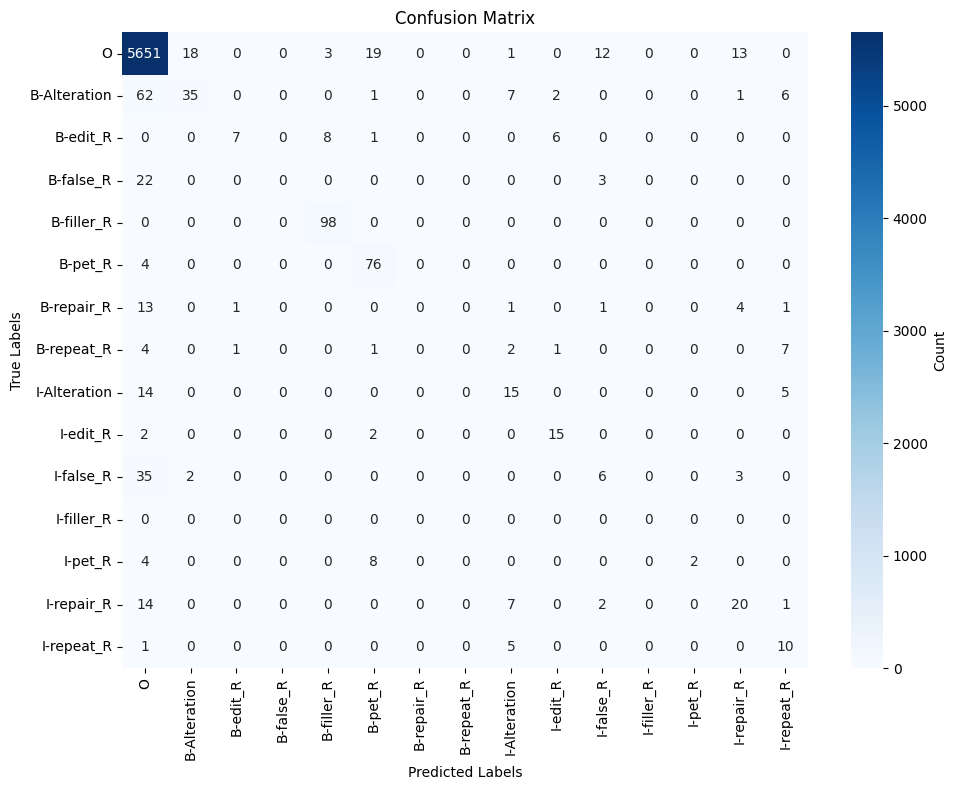

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a flat list of true labels and predicted labels
flat_true_labels = [label for sublist in true_labels for label in sublist]
flat_true_predictions = [label for sublist in true_predictions for label in sublist]

# Get the confusion matrix
conf_matrix = confusion_matrix(flat_true_labels, flat_true_predictions, labels=label_list)

# Set a larger figure size
plt.figure(figsize=(10, 8))

# Create a heatmap with adjusted parameters
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_list, yticklabels=label_list, cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Adjust layout to prevent cutoff
plt.tight_layout()

plt.show()